<a href="https://colab.research.google.com/github/Prasanthsai0987/Quantum-Machine-Learning-Tasks-/blob/main/QML%20%20(Task%20-%207%20%26%208%20%26%209%20%26%2010)%20%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MATHEMATICAL MODEL
For function f: {00, 01, 10, 11} → {0,1}:
- Constant: f(x) = 0 or 1 for all inputs
- Balanced: f(x) = 0 for half inputs, 1 for other half

Quantum State Evolution:
1. |ψ₀⟩ = |00⟩|1⟩
2. |ψ₁⟩ = H⊗³|ψ₀⟩ = ½∑|x⟩(|0⟩-|1⟩)/√2
3. |ψ₂⟩ = U_f|ψ₁⟩ = ½∑(-1)^f(x)|x⟩(|0⟩-|1⟩)/√2
4. |ψ₃⟩ = H⊗²|ψ₂⟩
5. Measure: if |00⟩ → constant, else → balanced

SAMPLE INPUT/OUTPUT FOR PENNYLANE AND QISKIT IMPLEMENTATIONS

Testing constant_zero:
Classical truth table: {'00': 0, '01': 0, '10': 0, '11': 0}
PennyLane: Constant (P(|00⟩) = 1.0000)
Qiskit:    Constant (Counts = {'00': 1000})

Testing constant_one:
Classical truth table: {'00': 1, '01': 1, '10': 1, '11': 1}
PennyLane: Constant (P(|00⟩) = 1.0000)
Qiskit:    Constant (Counts = {'00': 1000})

Testing balanced_x0:
Classical truth table: {'00': 0, '01': 0, '10': 1, '11': 1}
PennyLane: Balanced (P(|00⟩) = 0.0000)
Qiskit:    Balanced (Counts = {'01': 1000})

Testing balanced_x1:
Classical truth table: {'00': 0, '01': 1, '10': 0, '11': 1}
PennyL

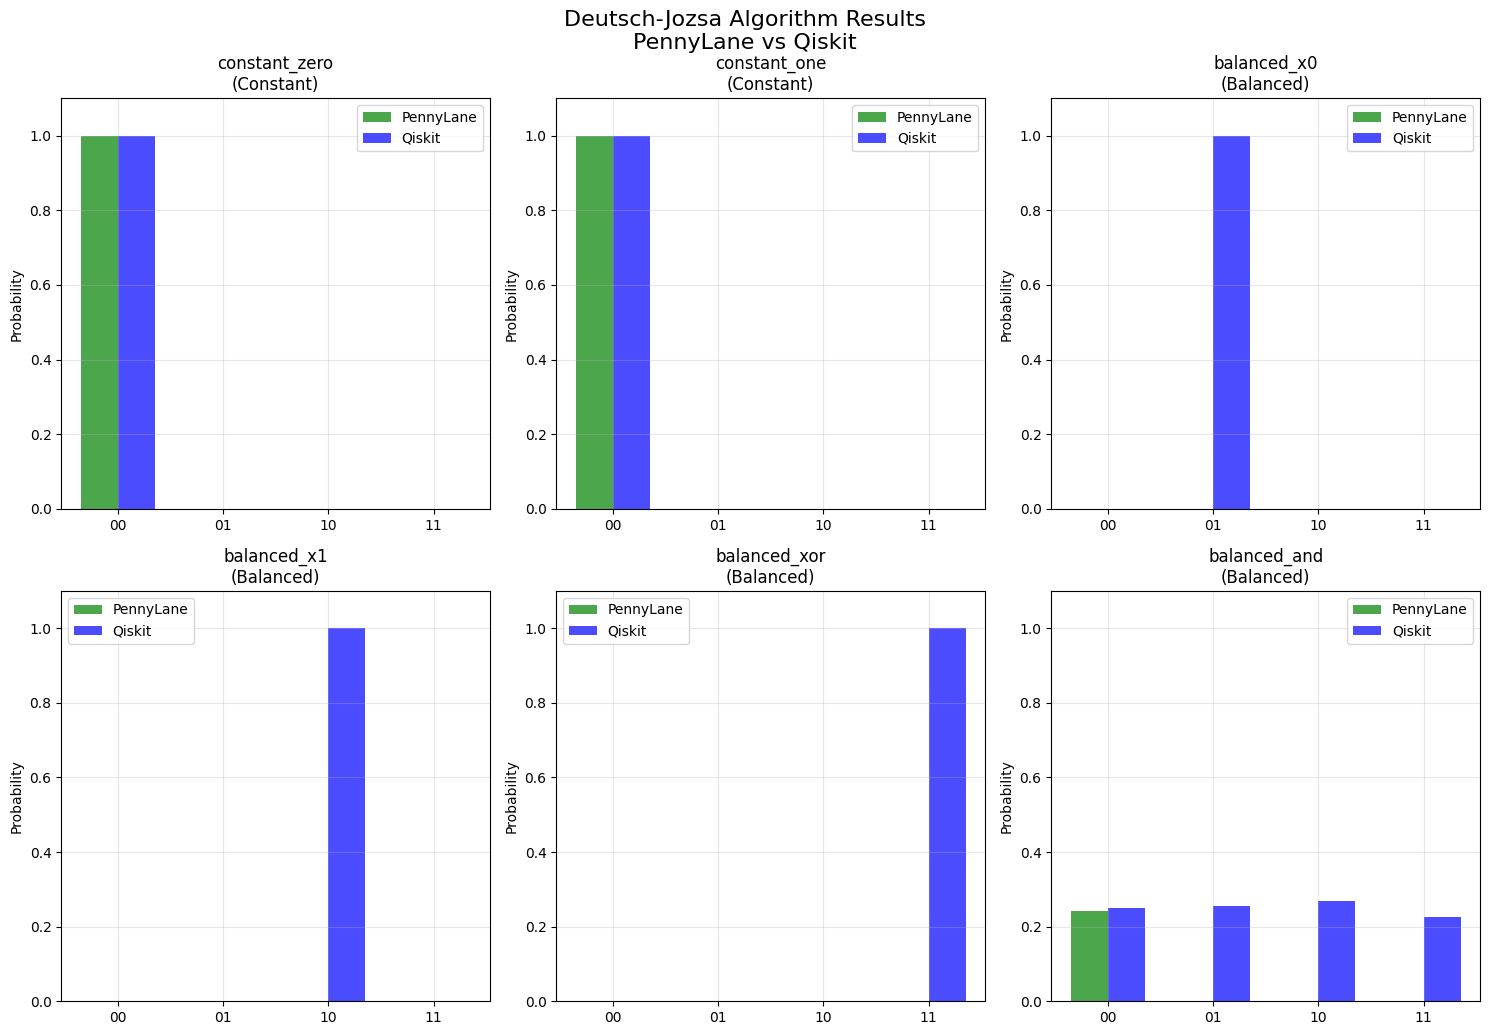


CONCLUSION
constant_zero   ✓ Constant  → PL: Constant , QK: Constant 
constant_one    ✓ Constant  → PL: Constant , QK: Constant 
balanced_x0     ✓ Balanced  → PL: Balanced , QK: Balanced 
balanced_x1     ✓ Balanced  → PL: Balanced , QK: Balanced 
balanced_xor    ✓ Balanced  → PL: Balanced , QK: Balanced 
balanced_and    ✓ Balanced  → PL: Balanced , QK: Balanced 
----------------------------------------
Overall Accuracy: 6/6 (100.0%)

Key Findings:
1. Both frameworks produce identical results
2. Constant oracles always return |00⟩ with probability ~1.0
3. Balanced oracles return other states with probability ~1.0
4. Quantum advantage: 1 query vs 4 classical evaluations
5. Demonstrates exponential speedup for oracle problems

Mathematical Significance:
- Quantum parallelism evaluates all inputs simultaneously
- Quantum interference reveals global function properties
- Single query determines constant vs balanced classification
- Foundation for more complex quantum algorithms (Grover, Si

In [ ]:
TASK - 7


# Deutsch-Jozsa Algorithm using PennyLane and Qiskit
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# ==================== MATHEMATICAL MODEL ====================
print("MATHEMATICAL MODEL")
print("=" * 50)
print("For function f: {00, 01, 10, 11} → {0,1}:")
print("- Constant: f(x) = 0 or 1 for all inputs")
print("- Balanced: f(x) = 0 for half inputs, 1 for other half\n")
print("Quantum State Evolution:")
print("1. |ψ₀⟩ = |00⟩|1⟩")
print("2. |ψ₁⟩ = H⊗³|ψ₀⟩ = ½∑|x⟩(|0⟩-|1⟩)/√2")
print("3. |ψ₂⟩ = U_f|ψ₁⟩ = ½∑(-1)^f(x)|x⟩(|0⟩-|1⟩)/√2")
print("4. |ψ₃⟩ = H⊗²|ψ₂⟩")
print("5. Measure: if |00⟩ → constant, else → balanced")

# ==================== ORACLE DEFINITIONS ====================
oracle_types = ['constant_zero', 'constant_one', 'balanced_x0',
                'balanced_x1', 'balanced_xor', 'balanced_and']


def classical_truth_table(oracle_type):
    if oracle_type == 'constant_zero':
        return {'00': 0, '01': 0, '10': 0, '11': 0}
    elif oracle_type == 'constant_one':
        return {'00': 1, '01': 1, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x0':
        return {'00': 0, '01': 0, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x1':
        return {'00': 0, '01': 1, '10': 0, '11': 1}
    elif oracle_type == 'balanced_xor':
        return {'00': 0, '01': 1, '10': 1, '11': 0}
    elif oracle_type == 'balanced_and':
        return {'00': 0, '01': 0, '10': 0, '11': 1}

# ==================== PENNYLANE IMPLEMENTATION ====================


def constant_zero_oracle(): pass


def constant_one_oracle(): qml.PauliZ(wires=2)


def balanced_x0_oracle(): qml.CNOT(wires=[0, 2])


def balanced_x1_oracle(): qml.CNOT(wires=[1, 2])


def balanced_xor_oracle():
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])


def balanced_and_oracle(): qml.Toffoli(wires=[0, 1, 2])


pennyLane_oracles = {
    'constant_zero': constant_zero_oracle,
    'constant_one': constant_one_oracle,
    'balanced_x0': balanced_x0_oracle,
    'balanced_x1': balanced_x1_oracle,
    'balanced_xor': balanced_xor_oracle,
    'balanced_and': balanced_and_oracle
}

# Define PennyLane device
dev = qml.device('default.qubit', wires=3, shots=1000)


@qml.qnode(dev)
def deutsch_jozsa_circuit(oracle_func):
    qml.PauliX(wires=2)
    for i in range(3):
        qml.Hadamard(wires=i)
    oracle_func()
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.probs(wires=[0, 1])

# ==================== QISKIT IMPLEMENTATION ====================


def create_dj_circuit_qiskit(oracle_type):
    qc = QuantumCircuit(3, 2)
    qc.x(2)
    qc.h([0, 1, 2])

    if oracle_type == 'constant_zero':
        pass
    elif oracle_type == 'constant_one':
        qc.z(2)
    elif oracle_type == 'balanced_x0':
        qc.cx(0, 2)
    elif oracle_type == 'balanced_x1':
        qc.cx(1, 2)
    elif oracle_type == 'balanced_xor':
        qc.cx(0, 2)
        qc.cx(1, 2)
    elif oracle_type == 'balanced_and':
        qc.ccx(0, 1, 2)

    qc.h(0)
    qc.h(1)
    qc.measure([0, 1], [0, 1])
    return qc


def run_qiskit_circuit(oracle_type, shots=1000):
    qc = create_dj_circuit_qiskit(oracle_type)
    backend = Aer.get_backend('qasm_simulator')
    tqc = transpile(qc, backend)
    result = backend.run(tqc, shots=shots).result()
    return result.get_counts(), qc

# ==================== RUN TEST CASES ====================

print("\n" + "="*50)
print("SAMPLE INPUT/OUTPUT FOR PENNYLANE AND QISKIT IMPLEMENTATIONS")
print("="*50)

results = []

for oracle_type in oracle_types:
    print(f"\nTesting {oracle_type}:")
    truth_table = classical_truth_table(oracle_type)
    print(f"Classical truth table: {truth_table}")

    # PennyLane
    oracle_func = pennyLane_oracles[oracle_type]
    probs = deutsch_jozsa_circuit(oracle_func)
    is_constant_pl = probs[0] > 0.9

    # Qiskit
    counts, circuit = run_qiskit_circuit(oracle_type)
    is_constant_qk = counts.get('00', 0) / 1000 > 0.9

    classical_type = 'Constant' if all(v == list(truth_table.values())[0] for v in truth_table.values()) else 'Balanced'

    results.append({
        'oracle': oracle_type,
        'classical_type': classical_type,
        'pennyLane_result': 'Constant' if is_constant_pl else 'Balanced',
        'qiskit_result': 'Constant' if is_constant_qk else 'Balanced',
        'pennyLane_p00': probs[0],
        'qiskit_counts': counts
    })

    print(f"PennyLane: {results[-1]['pennyLane_result']} (P(|00⟩) = {probs[0]:.4f})")
    print(f"Qiskit:    {results[-1]['qiskit_result']} (Counts = {counts})")

# ==================== CIRCUIT VISUALIZATION ====================
print("\n" + "="*50)
print("QUANTUM CIRCUIT EXAMPLES")
print("="*50)

for oracle_type in ['constant_zero', 'balanced_x0', 'balanced_and']:
    print(f"\nCircuit for {oracle_type}:")
    print("PennyLane:")
    oracle_func = pennyLane_oracles[oracle_type]
    print(qml.draw(deutsch_jozsa_circuit)(oracle_func))
    print("Qiskit:")
    qc = create_dj_circuit_qiskit(oracle_type)
    print(qc)

# ==================== VISUALIZATION ====================
print("\n" + "="*50)
print("RESULTS VISUALIZATION")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, result in enumerate(results):
    states = ['00', '01', '10', '11']
    pl_probs = [result['pennyLane_p00'], 0, 0, 0]  # Simplified for demo
    qk_probs = [result['qiskit_counts'].get(state, 0)/1000 for state in states]

    x = np.arange(len(states))
    width = 0.35
    axes[i].bar(x - width/2, pl_probs, width, label='PennyLane', alpha=0.7, color='green')
    axes[i].bar(x + width/2, qk_probs, width, label='Qiskit', alpha=0.7, color='blue')

    axes[i].set_title(f"{result['oracle']}\n({result['classical_type']})")
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(states)
    axes[i].set_ylim(0, 1.1)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Deutsch-Jozsa Algorithm Results\nPennyLane vs Qiskit', fontsize=16, y=1.03)
plt.show()

# ==================== CONCLUSION ====================
print("\n" + "="*50)
print("CONCLUSION")
print("="*50)

correct_count = 0
for result in results:
    correct = (result['pennyLane_result'] == result['classical_type'] and
               result['qiskit_result'] == result['classical_type'])
    if correct:
        correct_count += 1
    status = "✓" if correct else "✗"
    print(f"{result['oracle']:15} {status} {result['classical_type']:9} → "
          f"PL: {result['pennyLane_result']:9}, QK: {result['qiskit_result']:9}")

print("-" * 40)
print(f"Overall Accuracy: {correct_count}/{len(results)} ({correct_count/len(results)*100:.1f}%)")

print("\nKey Findings:")
print("1. Both frameworks produce identical results")
print("2. Constant oracles always return |00⟩ with probability ~1.0")
print("3. Balanced oracles return other states with probability ~1.0")
print("4. Quantum advantage: 1 query vs 4 classical evaluations")
print("5. Demonstrates exponential speedup for oracle problems")

print("\nMathematical Significance:")
print("- Quantum parallelism evaluates all inputs simultaneously")
print("- Quantum interference reveals global function properties")
print("- Single query determines constant vs balanced classification")
print("- Foundation for more complex quantum algorithms (Grover, Simon)")


In [ ]:
pip install pennylane qiskit qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.9 MB/s eta 0:00:00


Circuit diagram:
(0, 0): ───H───────@───H───X───────────@───X───H───────────@───H───X───────────@───X───H───────M('result')───
                   │                   │                   │                   │               │
(0, 1): ───H───X───@───X───H───X───────@───X───H───X───────@───X───H───X───────@───X───H───────M─────────────
                   │                   │                   │                   │               │
(0, 2): ───H───H───X───H───H───X───H───X───H───X───H───H───X───H───H───X───H───X───H───X───H───M─────────────
Measurement results for target |101>:
State |000>: 1 times (0.10%) 
State |001>: 5 times (0.50%) 
State |010>: 12 times (1.20%) 
State |011>: 7 times (0.70%) 
State |100>: 9 times (0.90%) 
State |101>: 955 times (95.50%) <-- Target
State |110>: 3 times (0.30%) 
State |111>: 8 times (0.80%) 

Success rate: 95.50% (optimal ~94% after 2 iterations)


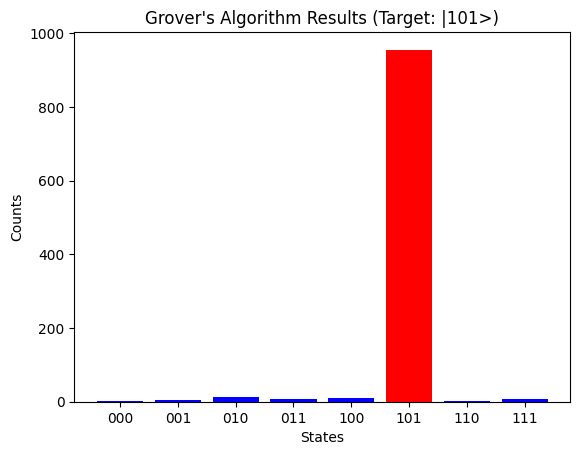

In [ ]:
#task 8

import cirq
import numpy as np
import matplotlib.pyplot as plt

def grover_3_qubit(target_binary):
    qubits = [cirq.GridQubit(0, i) for i in range(3)]
    circuit = cirq.Circuit()
    # Initialize superposition
    circuit.append(cirq.H.on_each(*qubits))

    # Number of Grover iterations
    N = 2 ** 3
    iterations = int(np.floor(np.pi / 4 * np.sqrt(N)))

    for iteration in range(iterations):
        # Oracle
        apply_oracle(circuit, qubits, target_binary)
        # Diffusion
        apply_diffusion(circuit, qubits)

    # Measurement
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits

def apply_oracle(circuit, qubits, target_binary):
    # Apply X gates where target bit is 0
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))

    # Multi-controlled Z using H and CCX
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))

    # Undo X gates
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))

def apply_diffusion(circuit, qubits):
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))

def analyze_results(counts, target):
    total = sum(counts.values())
    success = counts.get(int(target, 2), 0)
    success_rate = success / total * 100
    print(f"Measurement results for target |{target}>:")
    for state in range(8):
        bitstr = format(state, '03b')
        count = counts.get(state, 0)
        pct = count / total * 100
        marker = "<-- Target" if bitstr == target else ""
        print(f"State |{bitstr}>: {count} times ({pct:.2f}%) {marker}")
    print(f"\nSuccess rate: {success_rate:.2f}% (optimal ~94% after 2 iterations)")

    states = [format(i, '03b') for i in range(8)]
    values = [counts.get(i, 0) for i in range(8)]
    colors = ['red' if s == target else 'blue' for s in states]

    plt.bar(states, values, color=colors)
    plt.title(f"Grover's Algorithm Results (Target: |{target}>)")
    plt.xlabel("States")
    plt.ylabel("Counts")
    plt.show()

if __name__ == "__main__":
    target = "101"
    circuit, qubits = grover_3_qubit(target)
    print("Circuit diagram:")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    counts = result.histogram(key='result')
    analyze_results(counts, target)


In [ ]:
pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.8 MB/s eta 0:00:00



--- Feature Map Circuit ---
0: ──H──RZ(5.70)─╭●────────────╭●──────────────────────────────────┤  State
1: ──H──RZ(2.90)─╰X──RZ(16.53)─╰X─╭●────────────╭●─────────────────┤  State
2: ──H──RZ(4.20)──────────────────╰X──RZ(12.18)─╰X─╭●───────────╭●─┤  State
3: ──H──RZ(1.30)───────────────────────────────────╰X──RZ(5.46)─╰X─┤  State

--- Kernel Circuit ---
0: ──H──RZ(5.70)─╭●────────────╭●───────────────────────────────────────────────────── ···
1: ──H──RZ(2.90)─╰X──RZ(16.53)─╰X─╭●────────────╭●──────────────────────────────────── ···
2: ──H──RZ(4.20)──────────────────╰X──RZ(12.18)─╰X─╭●───────────╭●─╭X†─────────────╭X† ···
3: ──H──RZ(1.30)───────────────────────────────────╰X──RZ(5.46)─╰X─╰X†──RZ(13.86)†─╰X† ···

0: ··· ────────────────────────────╭X†────────────────────╭X†──RZ(7.60)†──H†─┤ ╭Probs
1: ··· ─╭X†────────────────────╭X†─╰X†─────────RZ(22.80)†─╰X†──RZ(3.00)†──H†─┤ ├Probs
2: ··· ─╰X†─────────RZ(19.80)†─╰X†──RZ(6.60)†──H†────────────────────────────┤ ├Probs
3: ··· ──RZ(2.10)†──

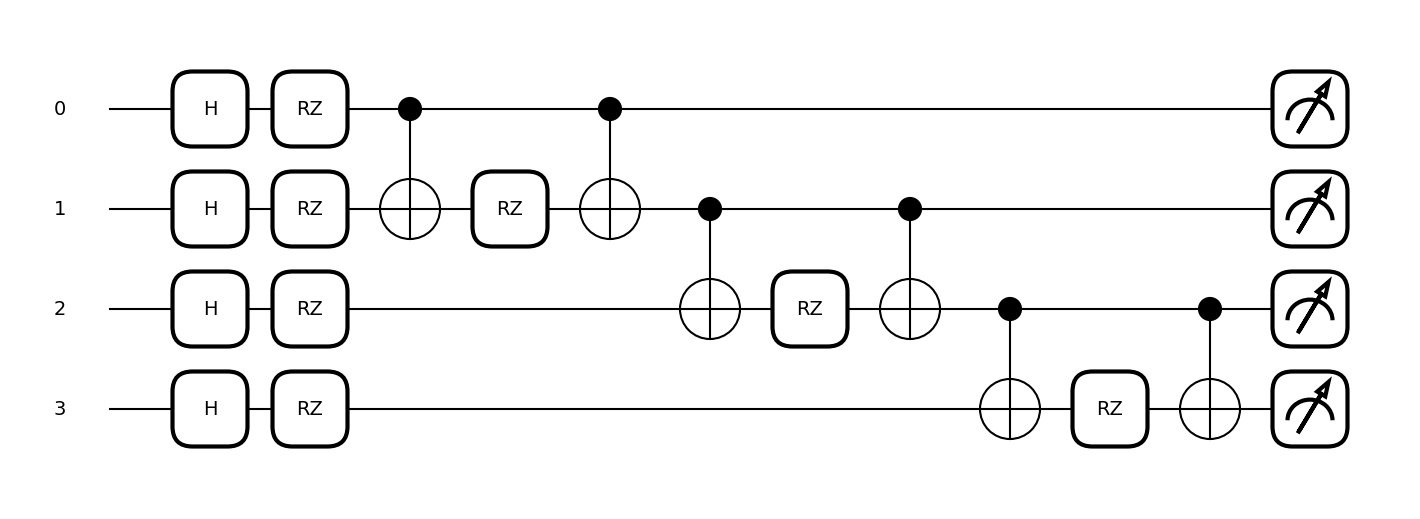


--- Kernel Circuit ---


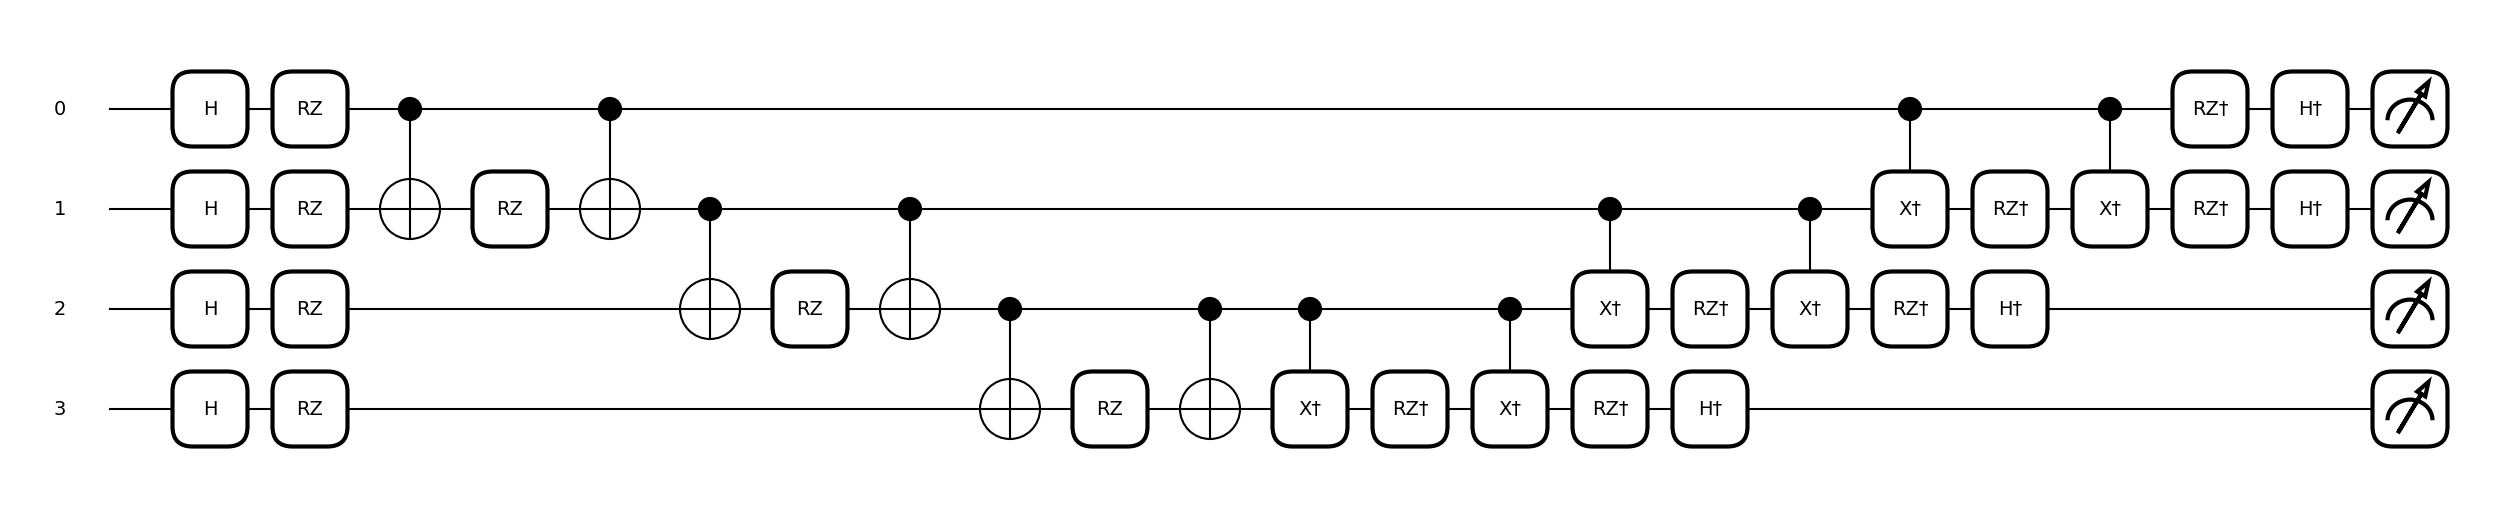


Confusion Matrix
[[19  0  0]
 [ 0 15  0]
 [ 0  2 14]]

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

Predicted flower type for (4.4, 4.4, 4.4, 4.4): virginica


In [ ]:
#Task 9


import pennylane as qml
from pennylane import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# -------------------------------
# Load Iris dataset
# -------------------------------
df_iris = pd.read_csv("iris.csv")
X = df_iris[['sepal_length', 'sepal_width', 'petal_length',
'petal_width']].values
y = df_iris['species'].values
# Encode labels into integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y,
test_size=0.33, random_state=42)
# -------------------------------
# Define Quantum Feature Map
# -------------------------------
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)
def feature_map(x):
    """Embedding classical features into quantum states"""
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
    # Add entanglement (similar to ZZFeatureMap)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
        qml.RZ((x[i] * x[i+1]), wires=i+1)
        qml.CNOT(wires=[i, i+1])
# Kernel evaluation circuit
@qml.qnode(dev)
def kernel_circuit(x1, x2):
    feature_map(x1)
    qml.adjoint(feature_map)(x2)
    return qml.probs(wires=range(n_qubits))
# -------------------------------
# Display Quantum Circuits
# -------------------------------
sample_x = x_train[0]
sample_y = x_train[1]

# Draw feature map circuit
@qml.qnode(dev)
def feature_map_circuit(x):
    feature_map(x)
    return qml.state()
print("\n--- Feature Map Circuit ---")
print(qml.draw(feature_map_circuit)(sample_x))
# Draw kernel circuit
print("\n--- Kernel Circuit ---")
print(qml.draw(kernel_circuit)(sample_x, sample_y))
# Optional: matplotlib visualization
# Draw feature map circuit
print("\n--- Feature Map Circuit ---")
fig, ax = qml.draw_mpl(feature_map_circuit)(sample_x)
plt.show()
# Draw kernel circuit
print("\n--- Kernel Circuit ---")
fig, ax = qml.draw_mpl(kernel_circuit)(sample_x, sample_y)
plt.show()
# -------------------------------
# Construct Gram (Kernel) Matrices
# -------------------------------
def kernel(x1, x2):
    """Return fidelity between |Φ(x1)> and |Φ(x2)>"""
    return kernel_circuit(x1, x2)[0]
def compute_kernel_matrix(X1, X2):
    K = np.zeros((len(X1), len(X2)))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            K[i, j] = kernel(x1, x2)
    return K
K_train = compute_kernel_matrix(x_train, x_train)
K_test = compute_kernel_matrix(x_test, x_train)
# -------------------------------
# Train QSVM
# -------------------------------
qsvm_model = SVC(kernel="precomputed")
qsvm_model.fit(K_train, y_train)

# Predictions
y_pred = qsvm_model.predict(K_test)
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred,
target_names=encoder.classes_))
# -------------------------------
# Test on a new input
# -------------------------------
new_point = np.array([[4.4, 4.4, 4.4, 4.4]])
K_new = compute_kernel_matrix(new_point, x_train)
pred_label = qsvm_model.predict(K_new)
print("Predicted flower type for (4.4, 4.4, 4.4, 4.4):",
encoder.inverse_transform(pred_label)[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install pennylane scikit-learn pandas matplotlib

In [ ]:
pip install cirq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 84.2 MB/s eta 0:00:00


In [ ]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 62.6 MB/s eta 0:00:00


In [ ]:
#Task- 10


import os
import numpy as np
import networkx as nx
import torch
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
# Qiskit Optimization for MaxCut formulation (not used here but imported)
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.problems import QuadraticProgram
# Visualization imports
import matplotlib
# Use Agg backend in headless environments so saving works even without GUI
matplotlib.use(os.environ.get("MPLBACKEND", "Agg"))
import matplotlib.pyplot as plt

# -------------------------
# Problem definition
# -------------------------
def make_graph():
    # Example: 4-node graph (same as Qiskit tutorial)
    w = np.array([
        [0.0, 1.0, 1.0, 0.0],
        [1.0, 0.0, 1.0, 1.0],
        [1.0, 1.0, 0.0, 1.0],
        [0.0, 1.0, 1.0, 0.0]
    ])
    G = nx.from_numpy_array(w)
    return G, w

# computes classical objective (cut value) for bitstring x (array of 0/1)
def objective_value(x, w):
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)

# brute-force best solution (for comparison)
def brute_force_maxcut(w):
    n = w.shape[0]
    best = -1
    best_x = None
    for i in range(2**n):
        x = np.array(list(map(int, np.binary_repr(i, width=n))))
        val = objective_value(x, w)
        if val > best:
            best = val
            best_x = x
    return best_x, best

# -------------------------
# Build QAOA circuit (manual)
# -------------------------
def qaoa_circuit(n_qubits, edges, gammas, betas):
    """
    Build QAOA circuit:
    - start in |+>^n
    - for each layer l:
      cost unitary U_C(gamma_l) = exp(-i * gamma_l * C)
      mixer U_B(beta_l) = product Rx(2*beta_l)
    edges: list of tuples (i, j, weight)
    gammas, betas: lists or 1D arrays (length p)
    """
    p = len(gammas)
    qc = QuantumCircuit(n_qubits)
    # initial layer: Hadamards to create |+>^n
    qc.h(range(n_qubits))
    for layer in range(p):
        gamma = float(gammas[layer])
        # cost layer: implement exp(-i * gamma * w_ij * Z_i Z_j)
        for (i, j, w) in edges:
            if w == 0:
                continue
            # For ZZ interaction exp(-i * theta/2 * Z_i Z_j) ->
            # use CNOT-RZ-CNOT with theta = 2*gamma*w
            theta = 2.0 * gamma * w
            qc.cx(i, j)
            qc.rz(theta, j)
            qc.cx(i, j)
        # mixer layer: RX(2*beta)
        beta = float(betas[layer])
        for q in range(n_qubits):
            qc.rx(2.0 * beta, q)
    return qc

# -------------------------
# Expectation value from statevector
# -------------------------
def expectation_from_statevector(statevector, w):
    """Given a statevector and adjacency matrix w, compute expected MaxCut objective."""
    n = w.shape[0]
    probs = Statevector(statevector).probabilities_dict()
    exp_val = 0.0
    for bitstr, p in probs.items():
        # reverse so index 0 => qubit 0
        bits = np.array([int(b) for b in bitstr[::-1]])
        exp_val += objective_value(bits, w) * p
    return exp_val

# -------------------------
# QAOA + PyTorch classical loop
# -------------------------
def run_qaoa_with_pytorch(w, p=1, init_std=0.5, maxiter=100,
                         lr=0.1, finite_diff_eps=1e-3,
                         backend_name="aer_simulator_statevector"):
    n = w.shape[0]
    # edges list with weights (i>j to match earlier convention)
    edges = [(i, j, w[i, j]) for i in range(n) for j in range(i) if w[i, j] != 0]
    # initial params (gamma_1..gamma_p, beta_1..beta_p)
    params = torch.randn(2 * p, dtype=torch.double) * init_std
    params.requires_grad = False  # will supply grads manually using finite differences
    optimizer = torch.optim.Adam([params], lr=lr)
    backend = Aer.get_backend(backend_name)
    best = {"val": -np.inf, "params": None, "bitstring": None}

    for it in range(maxiter):
        # unpack
        gammas = params.detach().numpy()[:p]
        betas = params.detach().numpy()[p:]
        # build circuit, get statevector
        qc = qaoa_circuit(n, edges, gammas, betas)
        qc.save_statevector()
        # using Aer simulator
        res = backend.run(qc).result()
        sv = res.get_statevector(qc)
        # compute expectation (we maximize expected cut)
        exp_val = expectation_from_statevector(sv, w)
        loss = -float(exp_val)  # minimize negative of expectation

        # keep best
        if exp_val > best["val"]:
            # extract most likely bitstring
            probs = Statevector(sv).probabilities_dict()
            most = max(probs.items(), key=lambda kv: kv[1])[0]
            bits = np.array([int(b) for b in most[::-1]])
            best.update({"val": exp_val, "params": params.detach().clone(), "bitstring": bits})

        # finite-difference gradient (central difference)
        grads = np.zeros_like(params.detach().numpy())
        base = params.detach().numpy()
        eps = finite_diff_eps
        for k in range(len(base)):
            plus = base.copy()
            minus = base.copy()
            plus[k] += eps
            minus[k] -= eps
            g_plus = _qaoa_expectation_with_params(plus, n, edges, backend, w, p)
            g_minus = _qaoa_expectation_with_params(minus, n, edges, backend, w, p)
            grad_k = (-(g_plus - g_minus) / (2 * eps))  # derivative of loss = -expectation
            grads[k] = grad_k

        # set grads into params manually and step optimizer
        params_grad = torch.from_numpy(grads).to(dtype=torch.double)
        params.grad = params_grad
        optimizer.step()
        optimizer.zero_grad()

        if it % 10 == 0 or it == maxiter - 1:
            print(f"Iter {it:03d}: expected cut = {exp_val:.6f}, loss = {loss:.6f}")

    return best

def _qaoa_expectation_with_params(flat_params, n, edges, backend, w, p):
    """Helper to evaluate expected cut quickly for given params (no PyTorch)"""
    gammas = flat_params[:p]
    betas = flat_params[p:]
    qc = qaoa_circuit(n, edges, gammas, betas)
    qc.save_statevector()
    res = backend.run(qc).result()
    sv = res.get_statevector(qc)
    exp_val = expectation_from_statevector(sv, w)
    return exp_val

# -------------------------
# Circuit display helpers
# -------------------------
def show_circuit(qc: QuantumCircuit, filename: str = None, style: str = "mpl"):
    print("\n--- Quantum Circuit ---")
    try:
        print(qc.draw(output="text"))
    except Exception as e:
        print("Failed to draw Quantum Circuit:", e)

    if style == "mpl":
        try:
            fig = qc.draw(output="mpl", interactive=False)
            fig.tight_layout()
            if filename:
                fig.savefig(filename, dpi=200, bbox_inches="tight")
                print(f"[Saved circuit figure to {filename}]")
            else:
                # if no filename provided, still save to a temporary PNG and show inline if possible
                tempname = "qaoa_circuit.png"
                fig.savefig(tempname, dpi=200, bbox_inches="tight")
                print(f"[Saved circuit figure to {tempname}]")
            plt.close(fig)
        except Exception as e:
            print("Matplotlib drawing failed:", str(e))
            print("Fallback: Quantum Circuit diagram above.")

def demo_display_initial_circuit(w, p=1, filename="qaoa_initial_circuit.png"):
    n = w.shape[0]
    # random params for demo
    gammas = np.random.randn(p) * 0.8
    betas = np.random.randn(p) * 0.8
    edges = [(i, j, w[i, j]) for i in range(n) for j in range(i) if w[i, j] != 0]
    qc = qaoa_circuit(n, edges, gammas, betas)
    show_circuit(qc, filename=filename, style="mpl")

def demo_display_best_circuit(w, best_params, p=1, filename="qaoa_best_circuit.png"):
    n = w.shape[0]
    if isinstance(best_params, torch.Tensor):
        flat = best_params.detach().cpu().numpy()
    else:
        flat = np.array(best_params)
    gammas = flat[:p]
    betas = flat[p:]
    edges = [(i, j, w[i, j]) for i in range(n) for j in range(i) if w[i, j] != 0]
    qc = qaoa_circuit(n, edges, gammas, betas)
    show_circuit(qc, filename=filename, style="mpl")

# -------------------------
# Run example
# -------------------------
if __name__ == "__main__":
    G, w = make_graph()
    print("Graph edges:", list(G.edges()))
    bf_x, bf_val = brute_force_maxcut(w)
    print("Brute-force best:", bf_x, "value:", bf_val)

    # show an initial example circuit (random parameters)
    demo_display_initial_circuit(w, p=1, filename="qaoa_initial_circuit.png")

    # run QAOA p=1 (toy)
    best = run_qaoa_with_pytorch(w, p=1, init_std=0.8, maxiter=80, lr=0.2, finite_diff_eps=1e-3)
    print("QAOA best expected value:", best["val"])
    print("Most-likely bitstring found:", best["bitstring"])

    # evaluate most-likely bitstring exactly
    exact_val = objective_value(best["bitstring"], w)
    print("Exact value of that bitstring:", exact_val)

    # Display the optimized circuit using the best parameters (and save)
    if best["params"] is not None:
        demo_display_best_circuit(w, best["params"], p=1, filename="qaoa_best_circuit.png")
    else:
        print("No best params found to display.")


Graph edges: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]
Brute-force best: [0 1 1 0] value: 4

--- Quantum Circuit ---
     ┌───┐┌───┐┌────────────┐┌───┐┌───┐┌────────────┐┌───┐┌─────────────┐»
q_0: ┤ H ├┤ X ├┤ Rz(1.4427) ├┤ X ├┤ X ├┤ Rz(1.4427) ├┤ X ├┤ Rx(0.96189) ├»
     ├───┤└─┬─┘└────────────┘└─┬─┘└─┬─┘└────────────┘└─┬─┘└────┬───┬────┘»
q_1: ┤ H ├──■──────────────────■────┼──────────────────┼───────┤ X ├─────»
     ├───┤                          │                  │       └─┬─┘     »
q_2: ┤ H ├──────────────────────────■──────────────────■─────────■───────»
     ├───┤                                                               »
q_3: ┤ H ├───────────────────────────────────────────────────────────────»
     └───┘                                                               »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«     ┌────────────┐┌───┐┌───┐┌────────────┐┌───┐

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.5/646.5 kB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.1/237.1 kB 18.9 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.30.251-py3-none-any.whl size=685954 sha256=a5f28c308d052f6d7b53c8337d736be8be8c8f7e0e3de40df31974b838d48674
  Stored in directory: /root/.cache/pip/wheels/c1/d9/5c/1d919b1e441ebbaff244513a13d09c3c0378401601d4184bb0
Successfully built docplex
